In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## EDA 
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

In [3]:
path = "../data/Cancer_Winsconcin.csv"
cancer_df = pd.read_csv(path)
cancer_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
cancer_df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
print(" El dataset contiene: \n    -", cancer_df.shape[0], 'registros\n    -',
      cancer_df.shape[1], ' características')

 El dataset contiene: 
    - 569 registros
    - 32  características


Revisamos si existen valores nulos en el dataset

In [7]:
nonval = pd.DataFrame(cancer_df.isnull().sum(), columns=['Value'])
print('Total de valores nulos: \n    -', nonval.Value.sum())

Total de valores nulos: 
    - 0


#### Análisis visual de las características más importantes


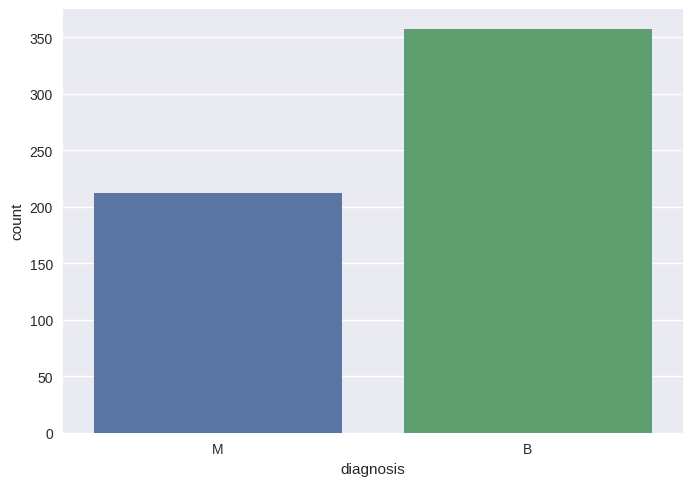

In [8]:
target_count = cancer_df['diagnosis'].value_counts()
sns.countplot(data=cancer_df, x='diagnosis')
plt.show()

In [9]:
# Convertimos la variable categórica 'diagnosis' a numerica
cancer_df = pd.get_dummies(cancer_df, columns=['diagnosis'], drop_first=True)


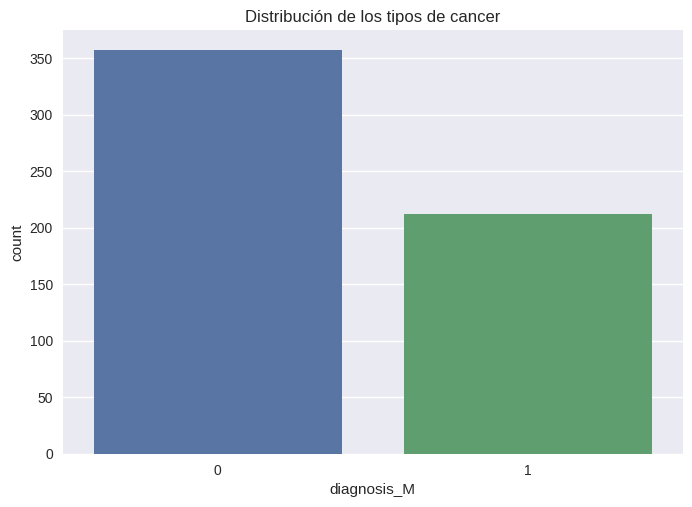

In [10]:
target_count = cancer_df['diagnosis_M'].value_counts()
sns.countplot(data=cancer_df, x='diagnosis_M')
plt.title('Distribución de los tipos de cancer')
plt.show()

<AxesSubplot:>

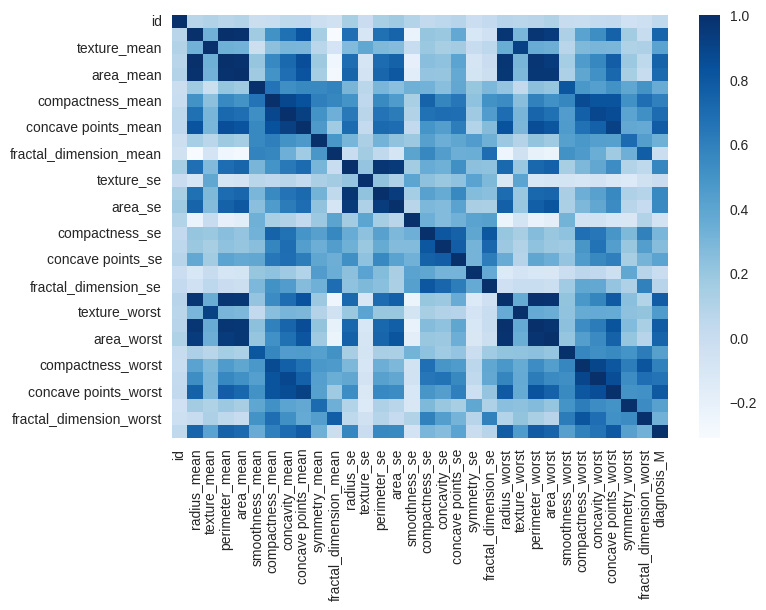

In [11]:
corr = cancer_df.corr()
sns.heatmap(corr, cmap='Blues')

##### Corrrelaciones positivas

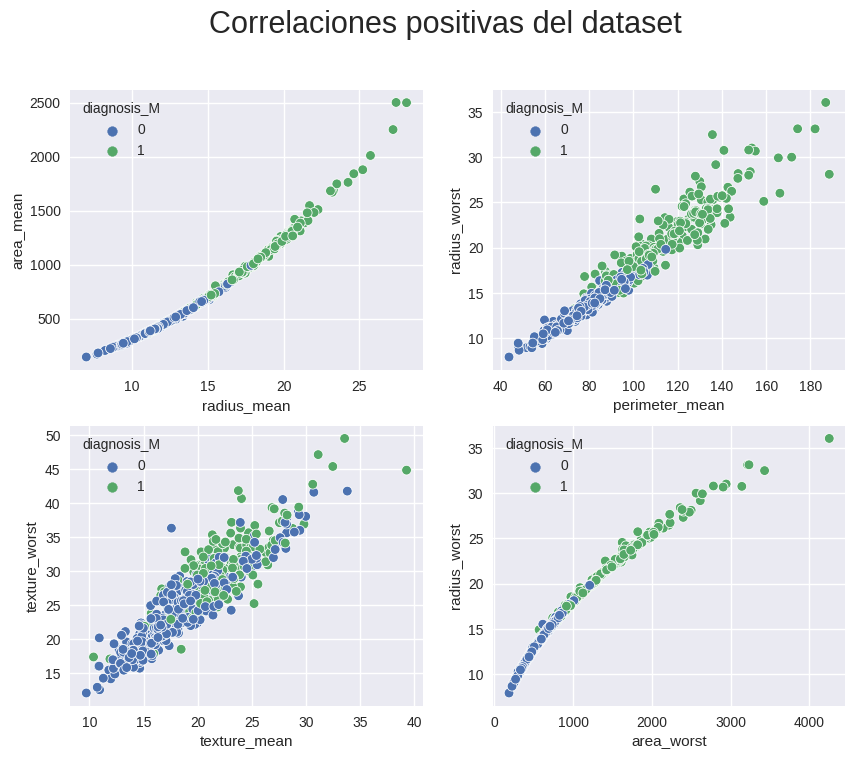

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle('Correlaciones positivas del dataset', fontsize=22)
sns.scatterplot(x=cancer_df['radius_mean'], y=cancer_df['area_mean'], hue=cancer_df['diagnosis_M'], ax=axes[0,0])
sns.scatterplot(x=cancer_df['perimeter_mean'], y=cancer_df['radius_worst'], hue=cancer_df['diagnosis_M'], ax=axes[0,1])
sns.scatterplot(x=cancer_df['texture_mean'], y=cancer_df['texture_worst'], hue=cancer_df['diagnosis_M'], ax=axes[1,0])
sns.scatterplot(x=cancer_df['area_worst'], y=cancer_df['radius_worst'], hue=cancer_df['diagnosis_M'], ax=axes[1,1])
plt.show()


### Matriz de confusión

- Verdadero positivo (TP): Tumor maligno correctamente identificado como maligno
- Verdadero negativo (VN): Tumor benigno identificado correctamente como benigno
- Falso positivo (FP): Tumor benigno identificado incorrectamente como maligno
- Falso negativo (FN): Tumor maligno identificado incorrectamente como benigno

<center>

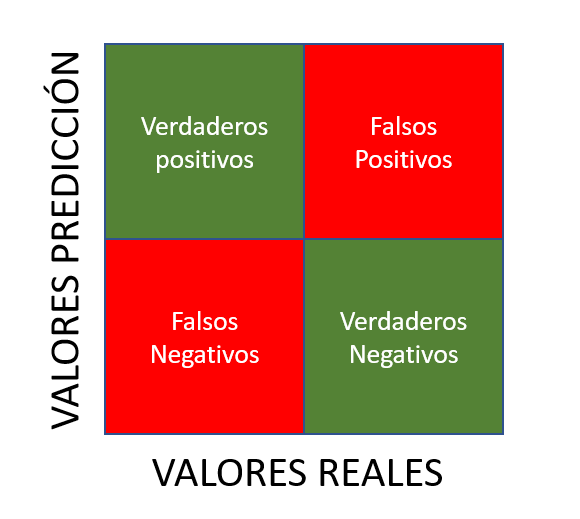


**Precisión:** La exactitud es la proporción de resultados verdaderos entre el número total de casos de la muestra : (TP +TN) / (TP + TN + FP +FN)

**Precisión:** La proporción de resultados positivos predichos que son realmente positivos : TP / (TP + FP)

**Recall OR Sensitivity OR TPR:** Proporción de positivos reales clasificados correctamente : TP / (TP + FN)

**Especificidad:** Proporción de negativos reales clasificados correctamente : TN/(TN + FP)

**Puntuación F1:** La puntuación F1 mantiene un equilibrio entre la precisión y la recuperación del clasificador, dando la misma importancia a la precisión y a la recuperación. Cuanto menor sea la precisión, menor será la puntuación F1. Cuanto menor sea la recuperación, menor será la puntuación F1. El valor F1 está entre 0 y 1 y es la media de precisión y recuperación: 2 * (Precisión * Recuperación / Precisión + Recuperación)

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, roc_curve, classification_report

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

**Cross Validation**
<center>

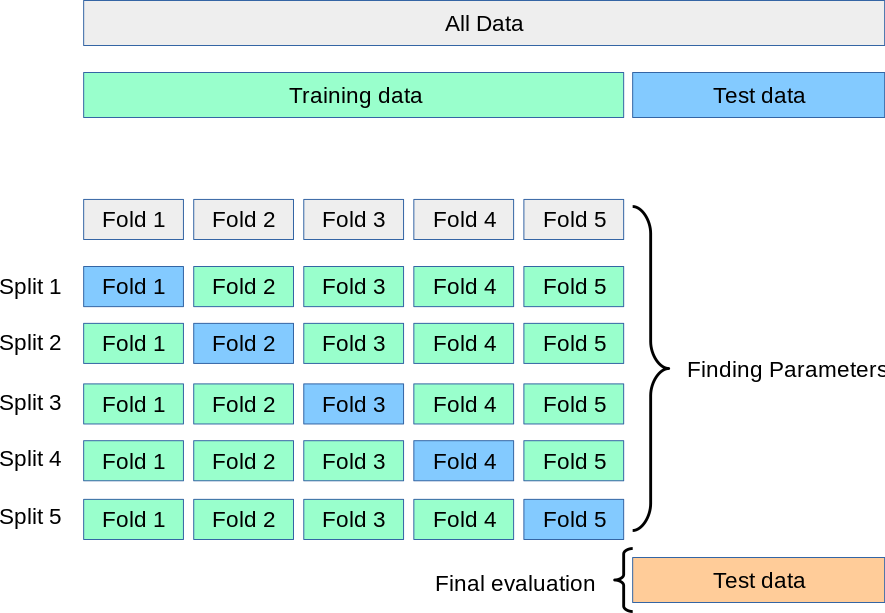




**Recursive features elimination:**
Es un método de selección de variables que asigna pesos a las características en función de su importancia para la variable predictora

In [14]:
X = cancer_df.drop(['diagnosis_M'], axis=1)
y = cancer_df['diagnosis_M']
random_seed = 1
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_seed, test_size=0.2)

In [15]:
# Using GridSearchCV in Logistic regression
param_grid = {'penalty' : ['l2'],
            'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
             }
log_clf = LogisticRegression()
CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1, cv=5)
CV_log_clf.fit(X_train, y_train)
best_parameters = CV_log_clf.best_params_

print('Los mejores parámetros encontrados por GridSearchCV: \n',
      'C:', best_parameters['C'])


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Los mejores parámetros encontrados por GridSearchCV: 
 C: 0.0001


In [16]:
plt.style.use('default')

In [17]:
log_clf = LogisticRegression(C = best_parameters['C'], penalty = best_parameters['penalty'],random_state = random_seed, solver='liblinear')
selector = RFE(log_clf)
selector = selector.fit(X_train, y_train)
y_pred = selector.predict(X_test)
y_score = selector.predict_proba(X_test)[:,1]

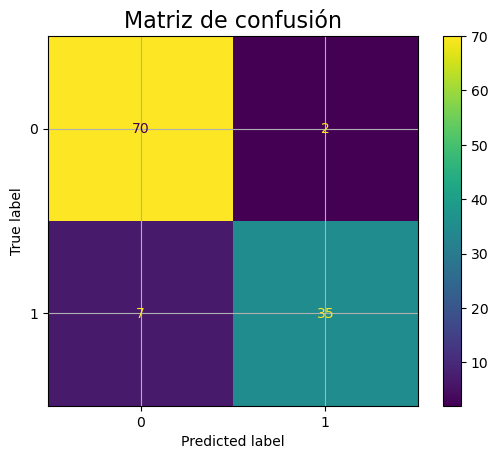

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Matriz de confusión', fontsize=16)
plt.grid(None)
plt.show()

Text(0.5, 1.0, 'Confusion Matrix. LR.')

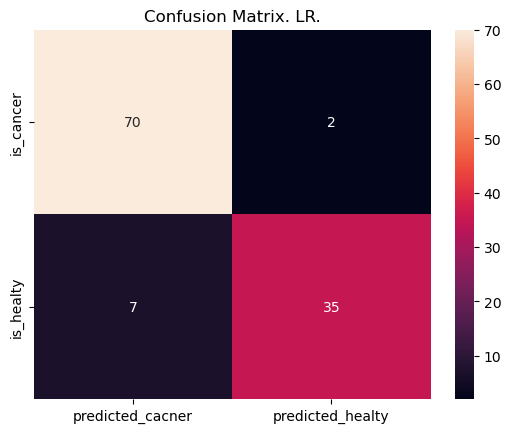

In [23]:
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healty'],
                         columns=['predicted_cacner', 'predicted_healty'])
confusion
sns.heatmap(confusion, annot=True)
plt.title('Confusion Matrix. LR.')

In [24]:
confusion

predicted_cacner  predicted_healty
is_cancer                70                 2
is_healty                 7                35

In [20]:
print('Métricas para evaluación de modelos de clasificación:')	
	
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Métricas para evaluación de modelos de clasificación:
Precision: 0.946
Recall: 0.833
Accuracy: 0.921
F1 Score: 0.886


**Conceptos importantes:**

The true positive rate is the proportion of observations that were correctly predicted to be positive out of all positive observations (TP/(TP + FN))                                                                    
Similarly, the false positive rate is the proportion of observations that are incorrectly predicted to be positive out of all negative observations (FP/(TN + FP)). 


AUC: Area under the curve


In [21]:
# ROC curve
# Flase and True positive rate 
fpr, tpr, t = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
disp.plot()
plt.plot([0, 1], [0, 1], "k--")
plt.title('Compute Receiver Operating Characteristic')
plt.show()

### Balanceo de clases
Arboles de decisión 